 ![Car_img](car_img.png)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('car data.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [57]:
columnss

['Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.shape

(301, 9)

In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [63]:
columnss = df.columns
columnss

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [64]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64
0    195
1    106
Name: Seller_Type, dtype: int64
0    261
1     40
Name: Transmission, dtype: int64


# Encoding the Categorical Data

In [13]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Spliting Data 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['Car_Name','Selling_Price'], axis=1)
Y = df['Selling_Price']

In [16]:
X.head()


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [17]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [18]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size=0.3, random_state=2, shuffle=True)
print(Xtrain.shape, Ytrain.shape)
print(Xtest.shape, Ytest.shape)

(210, 7) (210,)
(91, 7) (91,)


# Linear Regression 

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
le = LinearRegression()

In [21]:
le.fit(Xtrain,Ytrain)

LinearRegression()

In [22]:
pred = le.predict(Xtest)
pred

array([10.47979764,  0.75690882,  4.2746044 ,  5.09587542,  9.96280947,
        4.23790889,  7.48303996,  7.54347861,  0.2085049 ,  5.16652031,
        6.1862969 ,  6.36138011,  2.34247678,  7.69197   ,  1.9609899 ,
        1.7502047 ,  2.06459223,  1.89250839,  9.48516668,  4.2710413 ,
        1.51968495,  9.27695508,  1.49937834,  9.76123747,  0.86381105,
        8.23607772,  1.57709172, -3.19130995,  4.24596196,  2.13058921,
        3.64381787,  3.75052014,  5.57701312,  7.70995905, -1.85425479,
        6.97992069,  8.3669153 ,  5.80846789,  6.13729071,  6.44974101,
       16.19369437,  2.10928552,  1.09210522, -0.40818538,  6.99617167,
        6.76553097,  1.03168105,  7.00226734, 14.36455016,  3.04779912,
        8.20255775, -0.84148058,  8.90907148,  1.18954833,  2.15300849,
       -0.77210195,  0.72929015, 10.10503885, -0.41744747, -2.36684675,
       10.19768136,  6.76474884,  0.9962839 ,  4.35604977,  0.06839175,
        3.75593125,  2.83329902,  1.47321834,  0.45936063,  1.64

In [23]:
le.coef_

array([ 4.07273124e-01,  4.27820549e-01, -5.58666146e-06,  2.03342312e+00,
       -1.07398169e+00,  1.69413441e+00, -9.19539335e-01])

In [24]:
le.intercept_

-818.6420685697117

#  R2 Score

In [25]:
from sklearn.metrics import r2_score

In [26]:
test_score = r2_score(Ytest,pred)

In [27]:
train_score = r2_score(Ytrain,le.predict(Xtrain))

In [28]:
print("Testing R2 Score is : ", test_score)
print('Training R2 Score is: ', train_score)

Testing R2 Score is :  0.8191909743727105
Training R2 Score is:  0.8863492418513185


In [29]:
from yellowbrick.regressor import ResidualsPlot

D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


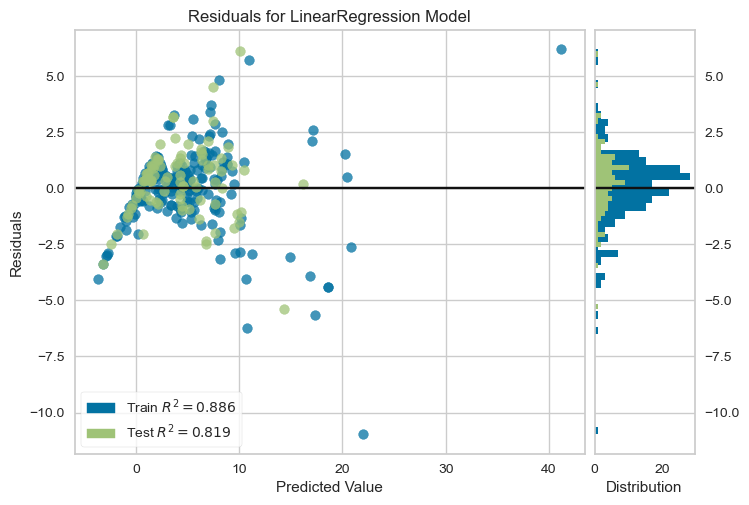

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [30]:
Visual = ResidualsPlot(le)
Visual.fit(Xtrain.values,Ytrain.values)
Visual.score(Xtest.values,Ytest.values)
Visual.poof()

# Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly_feature = PolynomialFeatures(degree = 2)

In [33]:
x_train_poly = poly_feature.fit_transform(Xtrain)
x_test_poly = poly_feature.fit_transform(Xtest)

In [34]:
poly_model = LinearRegression()

In [35]:
poly_model.fit(x_train_poly,Ytrain)

LinearRegression()

In [36]:
poly_test_pred = poly_model.predict(x_test_poly)

In [37]:
poly_train_pred = poly_model.predict(x_train_poly)

# R2 Score

In [38]:
poly_train_r2 = r2_score(Ytrain,poly_train_pred)
poly_test_r2 = r2_score(Ytest,poly_test_pred)

In [39]:
print("Training R2 Score: ", poly_train_r2)
print("Testing R2 Score: ", poly_test_r2)

Training R2 Score:  0.9509174790085997
Testing R2 Score:  0.8624298151573495


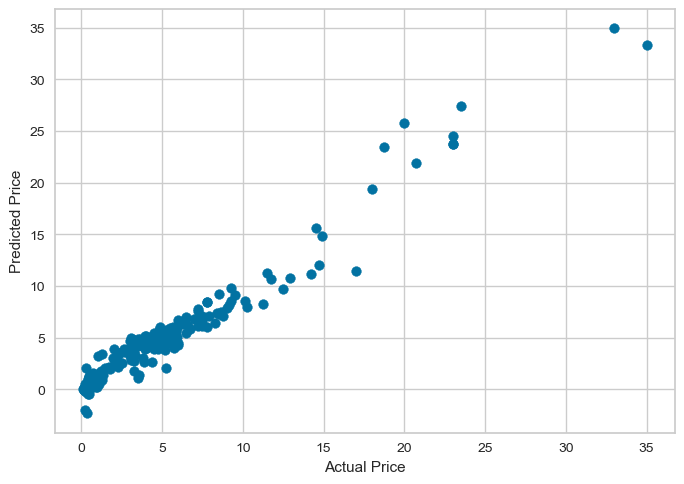

In [40]:
plt.scatter(Ytrain,poly_train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

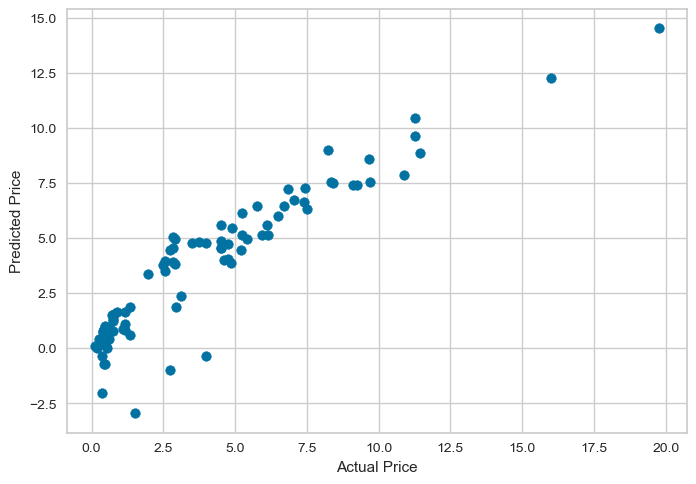

In [41]:
plt.scatter(Ytest,poly_test_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Recursive Feature Elimination

In [42]:
from sklearn.feature_selection import RFE

In [43]:
lrm = LinearRegression()

In [54]:
rfe = RFE(estimator=le, step=3)
rfe.fit(X,np.hstack(Y.values))

RFE(estimator=LinearRegression(), step=3)

In [65]:
feature_name = np.array(columnss)

list(feature_name[rfe.support_])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 9 but corresponding boolean dimension is 7

In [66]:
print("Optimal  number of Features: %d" % rfe.n_features_)
feature_cols_selected = list((feature_name)[rfe.support])
print("Features selected: " + str(feature_cols_selected))

Optimal  number of Features: 3


AttributeError: 'RFE' object has no attribute 'support'

# Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
score = cross_val_score(poly_model,Xtrain,Ytrain, cv=8)

In [79]:
print(score)

[0.81801374 0.7871675  0.75917476 0.876205   0.90527237 0.78363668
 0.89279033 0.75625868]


In [80]:
print(score.mean()*100)

82.23148807275251


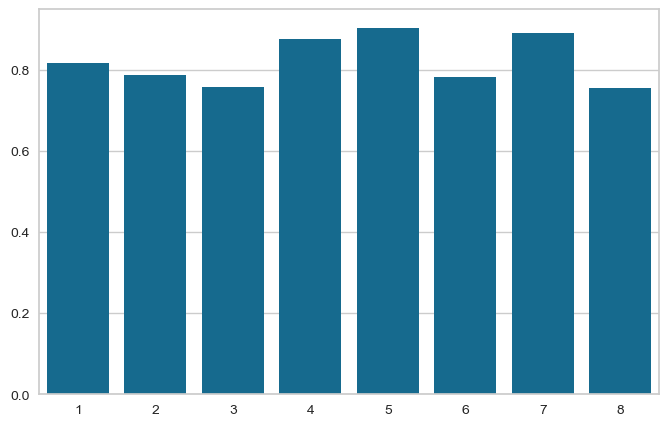

In [81]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(range(1,len(score)+1)),y=score, color='b')
plt.show()